<a href="https://colab.research.google.com/github/suryasud/DS200-data-science-visualizations/blob/main/data_visualization_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys                         # System-specific parameters and functions
import gdown                       # Download files from Google Drive/Colab
import cmath                       # Complex number mathematics
import numpy as np                 # Array and numerical operations
import pandas as pd                # Data manipulation and analysis
import seaborn as sns              # Statistical data visualization

from tqdm import tqdm              # Progress bars for loops
import matplotlib as mpl           # Matplotlib configuration/settings
import matplotlib.pyplot as plt    # Plotting and charting functions
from typing import Tuple, Callable # Type hinting for complex structures

## Central Sector Schemes

Dataset Source:
</strong> <a href="https://www.data.gov.in/resource/central-sector-schemes-2020-2021-2020-21-2022-23">Central Sector Schemes (2020-2021, 2021-22, 2022-23)</a> <br>
from <a href="https://data.gov.in">data.gov.in</a>

All the figures mentioned are in Crores

In [ ]:
# For downloading the file (Central Sector Schemes stored as .csv file on Google Drive)
central_sector_schemes = 'https://drive.google.com/file/d/1jkoynty9n0Z5q2R7LjJG5xIsByZ-FdpH/view?usp=sharing'
cen_sec_schemes = '/content/sample_data/central_sector_schemes.csv'
gdown.download(central_sector_schemes, cen_sec_schemes, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1jkoynty9n0Z5q2R7LjJG5xIsByZ-FdpH
To: /content/sample_data/central_sector_schemes.csv
100%|██████████| 117k/117k [00:00<00:00, 23.9MB/s]


'/content/sample_data/central_sector_schemes.csv'

Data cleaning <br>
Cleaning column names <br>
Replacing some NaNs with 0 values <br>

In [ ]:
df = pd.read_csv(cen_sec_schemes)
df.columns = df.columns.str.replace('\n', '').str.strip()
df.columns = df.columns.str.replace('  ', '', regex=False)
df_clean = df.fillna(df.select_dtypes(include=np.number).fillna(0))
df_clean

,Category,Sl.No.,Ministry/Department,Scheme,Actuals 2020-2021 Revenue,Actuals 2020-2021 Capital,Actuals 2020-2021 Total,Budget Estimates 2021-2022 Revenue,Budget Estimates 2021-2022 Capital,Budget Estimates 2021-2022 Total,Revised Estimates2021-2022 Revenue,Revised Estimates 2021-2022 Revenue,Revised Estimates2021-2022 Total,Budget Estimates2022-2023 Revenue,Budget Estimates2022-2023 Capital,Budget Estimates2022-2023 Total
0,Demand No. 1,NaN,Department of Agriculture and Farmers Welfare,Total,95779.92,0.00,95779.92,105018.81,0.0,105018.81,106428.80,0.00,106428.80,105710.00,0.00,105710.00
1,Demand No. 1,1,Department of Agriculture and Farmers Welfare,Crop Insurance Scheme,14161.48,0.00,14161.48,0.00,0.0,16000.00,15989.39,0.00,15989.39,15500.00,0.00,15500.00
2,Demand No. 1,2,Department of Agriculture and Farmers Welfare,Interest Subsidy for Short Term Credit to Farmers,17789.72,0.00,17789.72,0.00,0.0,19468.31,18142.30,0.00,18142.30,0.00,0.00,0.00
3,Demand No. 1,3,Department of Agriculture and Farmers Welfare,Modified Interest Subvention Scheme (MISS),0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,19500.00,0.00,19500.00
4,Demand No. 1,4,Department of Agriculture and Farmers Welfare,Market Intervention Scheme and Price Support S...,1357.91,0.00,1357.91,0.00,0.0,1500.50,3595.61,0.00,3595.61,1500.00,0.00,1500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Demand No. 102,737,Ministry of Youth Affairs and Sports,National Welfare Fund for Sports Persons,2.00,0.00,2.00,0.00,0.0,2.00,2.00,0.00,2.00,2.00,0.00,2.00
804,Demand No. 102,738,Ministry of Youth Affairs and Sports,Khelo India,338.06,0.00,338.06,0.00,0.0,657.71,869.00,0.00,869.00,974.00,0.00,974.00
805,Demand No. 102,739,Ministry of Youth Affairs and Sports,Enhancement of Sports Facility at J& K,25.00,0.00,25.00,0.00,0.0,50.00,15.00,0.00,15.00,50.00,0.00,50.00
806,Demand No. 102,740,Ministry of Youth Affairs and Sports,Commonwealth Games,75.00,0.00,75.00,0.00,0.0,30.00,100.00,0.00,100.00,30.00,0.00,30.00


In [ ]:
df_clean.columns

Index(['Category', 'Sl.No.', 'Ministry/Department', 'Scheme',
       'Actuals 2020-2021 Revenue', 'Actuals 2020-2021 Capital',
       'Actuals 2020-2021 Total', 'Budget Estimates 2021-2022 Revenue',
       'Budget Estimates 2021-2022 Capital',
       'Budget Estimates 2021-2022 Total',
       'Revised Estimates2021-2022 Revenue',
       'Revised Estimates 2021-2022 Revenue',
       'Revised Estimates2021-2022 Total', 'Budget Estimates2022-2023 Revenue',
       'Budget Estimates2022-2023 Capital', 'Budget Estimates2022-2023 Total'],
      dtype='object')

In [ ]:
df_clean = df_clean.loc[0:806, :]
df_group = df_clean.groupby('Ministry/Department').sum(numeric_only=True).sort_values(by="Actuals 2020-2021 Revenue",
                                                                                      ascending=False,
                                                                                      ignore_index=False)
df_group

,Actuals 2020-2021 Revenue,Actuals 2020-2021 Capital,Actuals 2020-2021 Total,Budget Estimates 2021-2022 Revenue,Budget Estimates 2021-2022 Capital,Budget Estimates 2021-2022 Total,Revised Estimates2021-2022 Revenue,Revised Estimates 2021-2022 Revenue,Revised Estimates2021-2022 Total,Budget Estimates2022-2023 Revenue,Budget Estimates2022-2023 Capital,Budget Estimates2022-2023 Total
Ministry/Department,,,,,,,,,,,,
Department of Food and Public Distribution,1108269.44,369.06,1108638.50,251266.17,440.42,502532.34,598447.00,262.20,598709.20,414384.58,197.62,414582.20
Department of Fertilisers,255843.48,0.00,255843.48,79529.68,0.00,159059.36,280244.64,0.00,280244.64,210444.64,0.00,210444.64
Department of Agriculture and Farmers Welfare,191559.84,0.00,191559.84,105018.81,0.00,210037.62,212857.60,0.00,212857.60,211420.00,0.00,211420.00
Ministry of Petroleum and Natural Gas,79108.90,4626.00,83734.90,15695.00,854.00,31390.00,16442.96,795.32,17238.28,16275.64,1200.00,17475.64
Department of Health and Family Welfare,37312.76,6324.12,43636.88,10566.63,3887.96,21133.26,21784.14,6662.48,28446.62,20631.26,9695.18,30326.44
...,...,...,...,...,...,...,...,...,...,...,...,...
Department of Public Enterprises,7.40,0.00,7.40,8.55,0.00,17.10,13.60,0.00,13.60,17.10,0.00,17.10
Ministry of Steel,1.08,0.00,1.08,5.00,0.00,10.00,9.62,0.00,9.62,8.98,0.00,8.98
Capital Outlay on Defence Services,0.00,268609.84,268609.84,135060.72,270121.44,270121.44,0.00,277701.80,277701.80,0.00,304739.22,304739.22


In [ ]:
# Set the global font to Helvetica before plotting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica'] + plt.rcParams['font.serif']

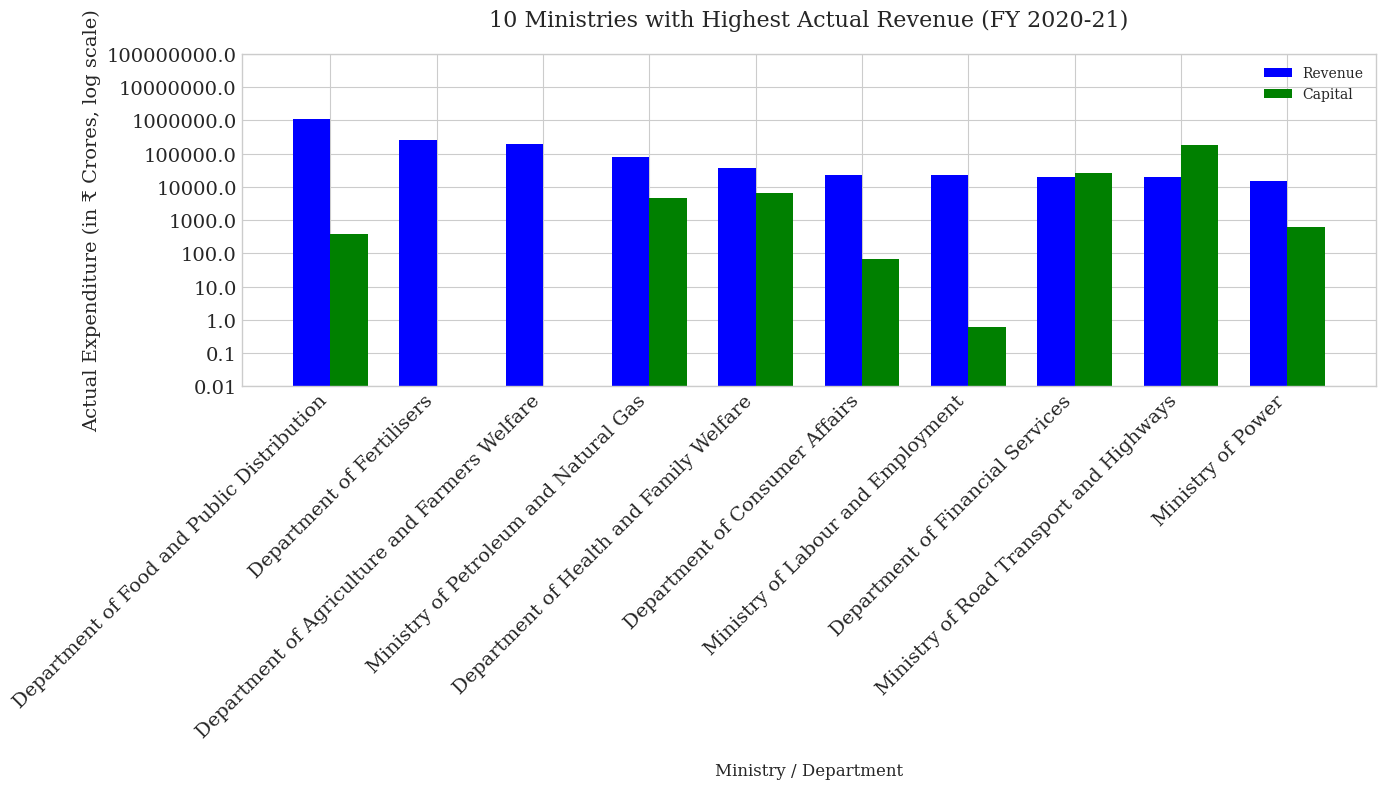

In [ ]:
x = np.arange(10)
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width/2, df_group['Actuals 2020-2021 Revenue'].values[0:10], width, label='Revenue', color='blue')
rects2 = ax.bar(x + width/2, df_group['Actuals 2020-2021 Capital'].values[0:10], width, label='Capital', color='green')

ax.set_xlabel('Ministry / Department', fontsize=12, labelpad=15)
ax.set_ylabel('Actual Expenditure (in ₹ Crores, log scale)', fontsize=14)
ax.set_title('10 Ministries with Highest Actual Revenue (FY 2020-21)', fontsize=16, pad=20)

ax.set_xticks(x)
ax.set_xticklabels(df_group.index[0:10], rotation=45, ha='right', fontsize=14)

ax.set_yscale("log")
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.tick_params(axis='both', which="both", direction="in")

ax.legend()
plt.tight_layout()
plt.show()

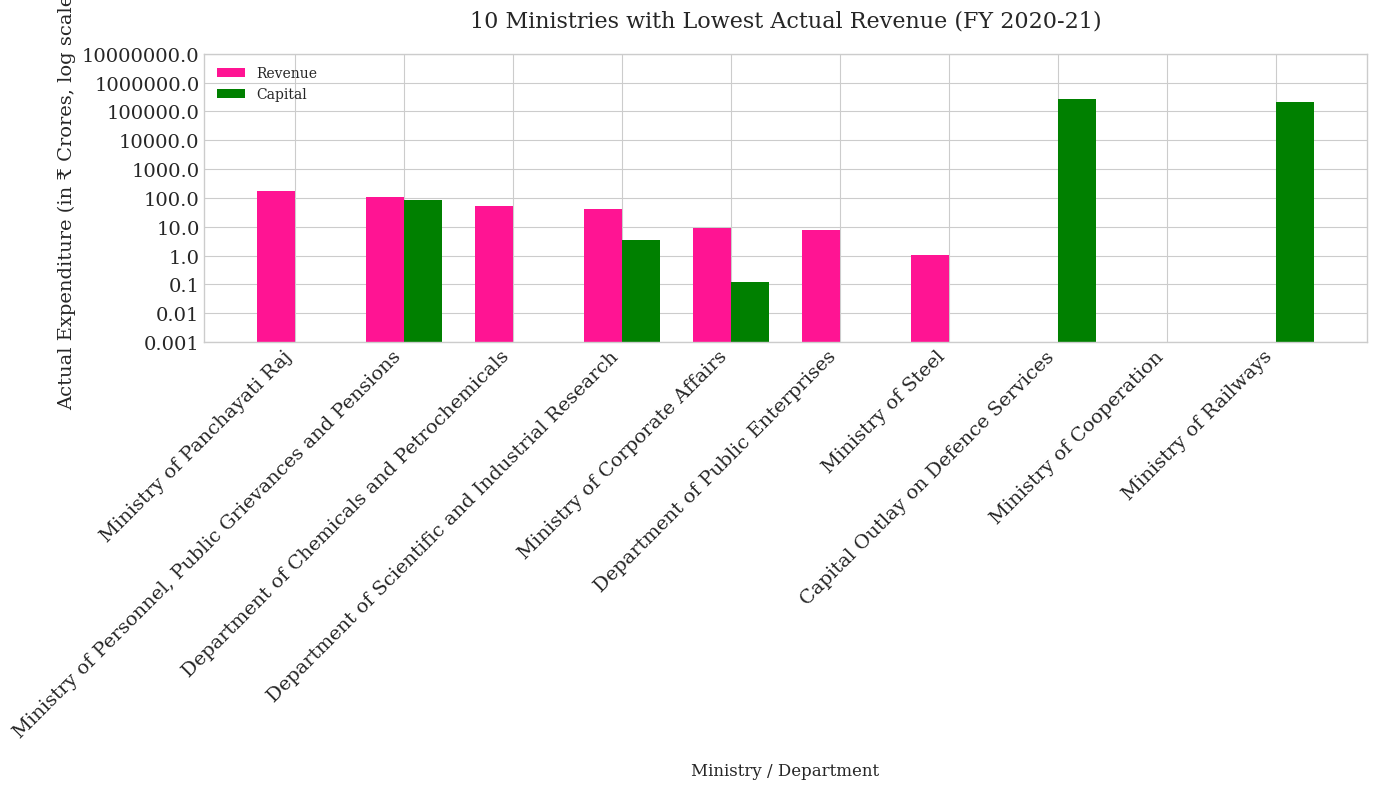

In [ ]:
x = np.arange(10)
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width/2, df_group['Actuals 2020-2021 Revenue'].values[-10:], width, label='Revenue', color='deeppink')
rects2 = ax.bar(x + width/2, df_group['Actuals 2020-2021 Capital'].values[-10:], width, label='Capital', color='green')

ax.set_xlabel('Ministry / Department', fontsize=12, labelpad=15)
ax.set_ylabel('Actual Expenditure (in ₹ Crores, log scale)', fontsize=14)
ax.set_title('10 Ministries with Lowest Actual Revenue (FY 2020-21)', fontsize=16, pad=20)

ax.set_xticks(x)
ax.set_xticklabels(df_group.index[-10:], rotation=45, ha='right', fontsize=14)

ax.set_yscale("log")
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.tick_params(axis='both', which="both", direction="in")

ax.legend()
fig.tight_layout()
plt.show()


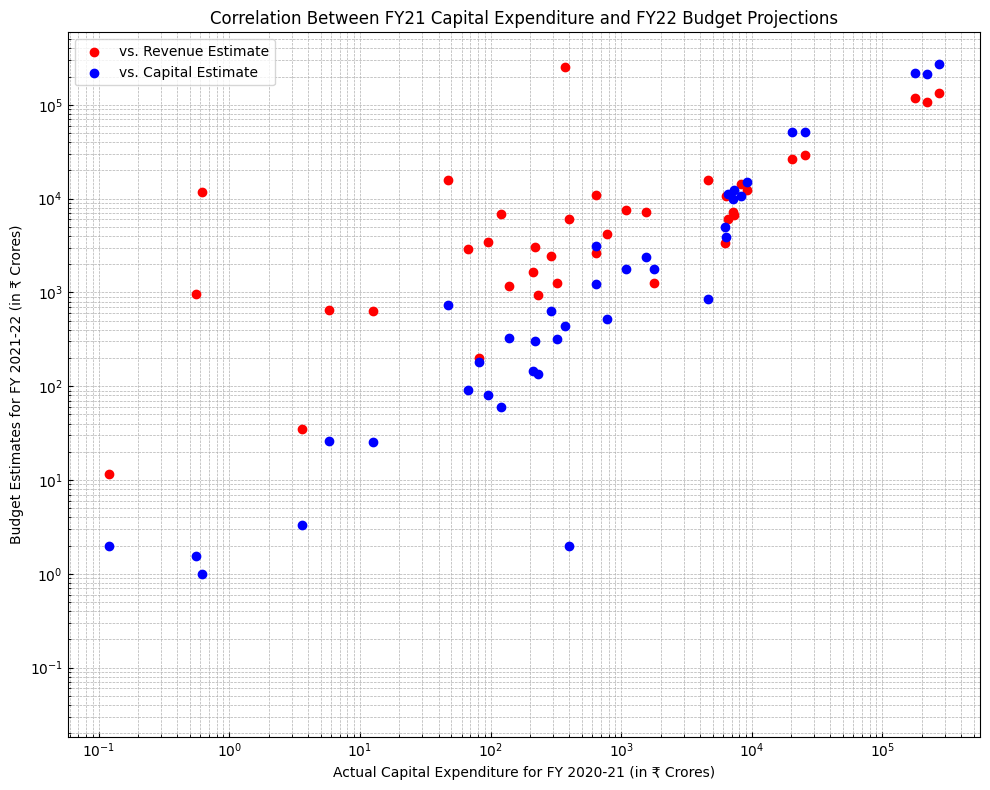

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for Capital vs. Revenue
ax.scatter(df_group['Actuals 2020-2021 Capital'],
           df_group['Budget Estimates 2021-2022 Revenue'],
           color="red",
           label="vs. Revenue Estimate", zorder=2)

# Scatter plot for Capital vs. Capital
ax.scatter(df_group['Actuals 2020-2021 Capital'],
           df_group['Budget Estimates 2021-2022 Capital'],
           color="blue",
           label="vs. Capital Estimate", zorder=2)


ax.set_title("Correlation Between FY21 Capital Expenditure and FY22 Budget Projections")
ax.set_xlabel("Actual Capital Expenditure for FY 2020-21 (in ₹ Crores)")
ax.set_ylabel("Budget Estimates for FY 2021-22 (in ₹ Crores)")

ax.set_yscale("log")
ax.set_xscale("log")
ax.tick_params(axis='both', which="both", direction="in")
ax.grid(True, which="both", ls="--", linewidth=0.5, zorder=1)

plt.legend()
plt.tight_layout()
plt.show()


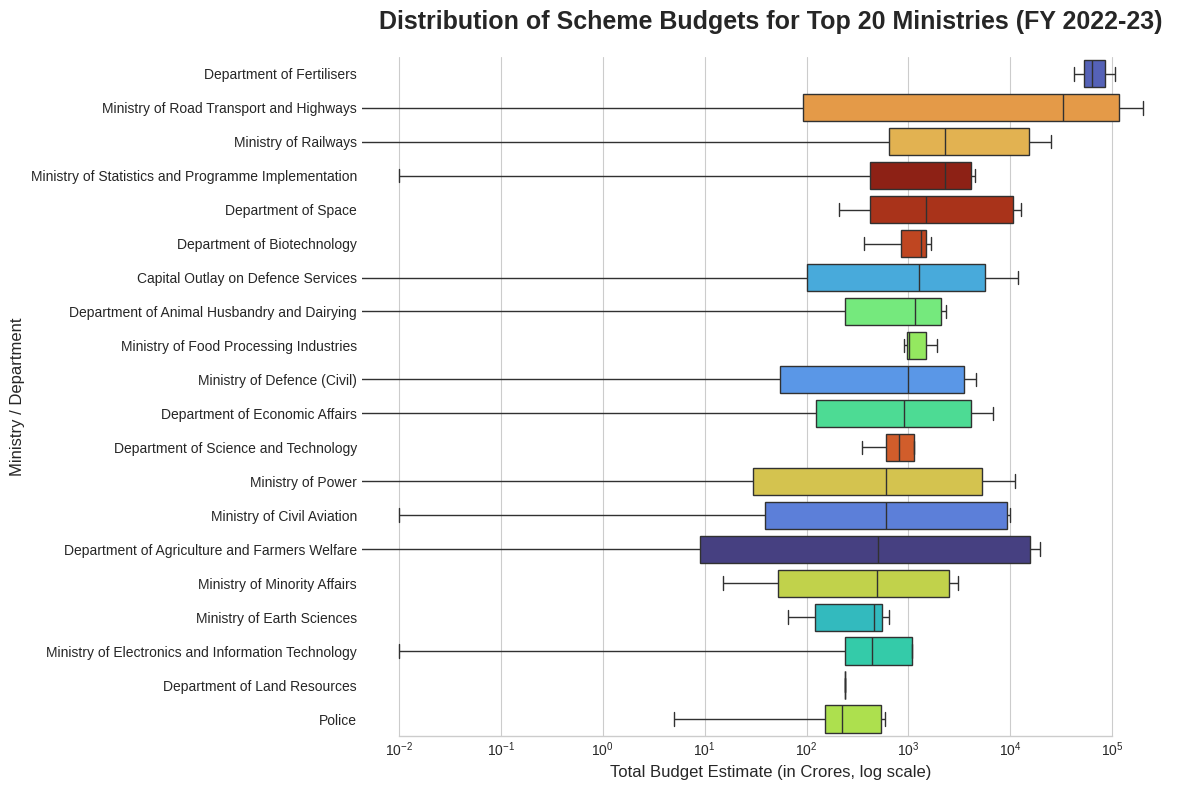

In [ ]:
# Identifying the top 10 ministries by median budget.
top_20_ministries = (
    df_clean.groupby('Ministry/Department')['Budget Estimates2022-2023 Total']
    .median()
    .sort_values(ascending=False)
    .head(20)
    .index
)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(
    data=df_clean[df_clean['Ministry/Department'].isin(top_20_ministries)],
    x='Budget Estimates2022-2023 Total',
    y='Ministry/Department',
    order=top_20_ministries,
    palette='turbo',
    hue='Ministry/Department',
    legend=False,
    ax=ax,
    fliersize=0 # Hide the default outlier markers
)

ax.set_xscale('log')
ax.set_title('Distribution of Scheme Budgets for Top 20 Ministries (FY 2022-23)', fontsize=18, pad=20, weight='bold')
ax.set_xlabel('Total Budget Estimate (in Crores, log scale)', fontsize=12)
ax.set_ylabel('Ministry / Department', fontsize=12)
sns.despine(trim=True, left=True)

plt.tight_layout()
plt.show()



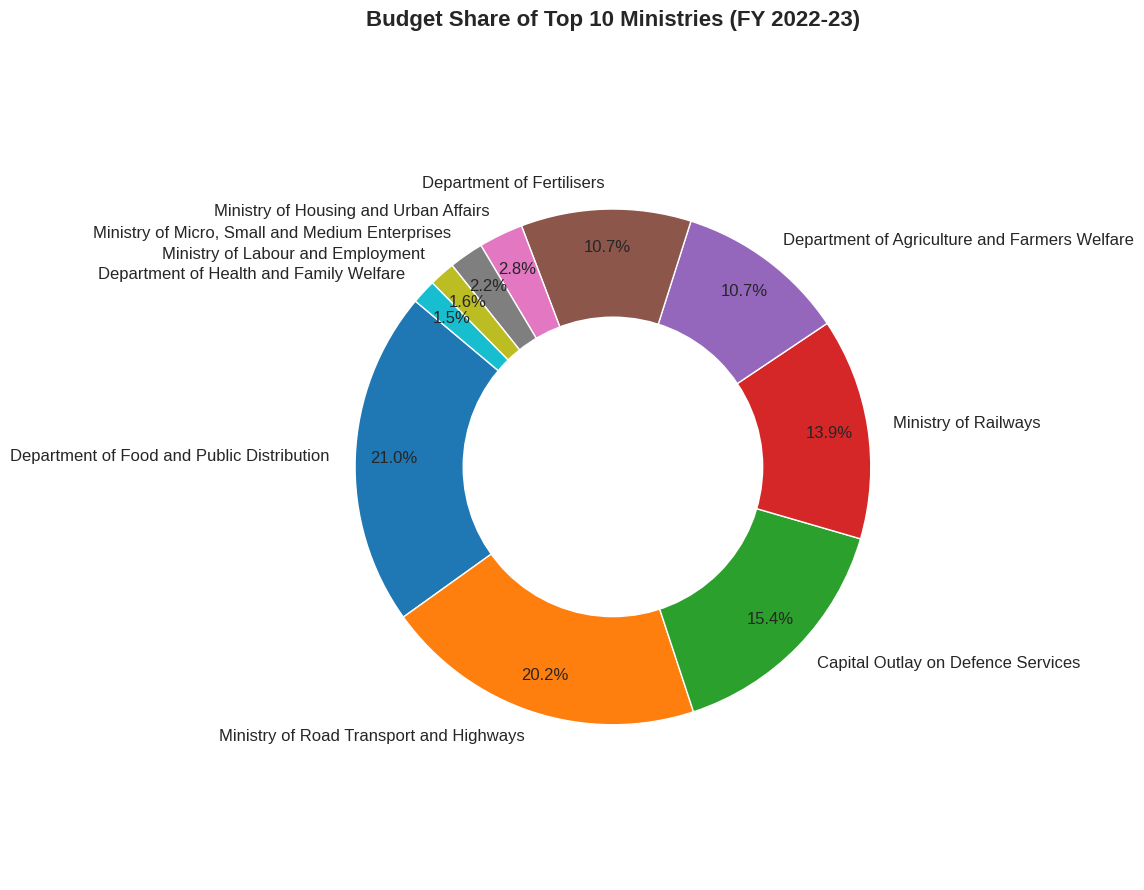

In [ ]:
# 1. Group by ministry and sum their total budgets to get a total for each ministry.
ministry_totals = df_clean.groupby('Ministry/Department')['Budget Estimates2022-2023 Total'].sum()

# 2. Find the 10 ministries with the largest total budgets from the aggregated data.
top_10_ministries = ministry_totals.nlargest(10)


# --- Plotting the Donut Chart ---
plt.figure(figsize=(11, 9)) # Use a slightly larger figure to prevent labels from overlapping

# Use the values and index (ministry names) from our aggregated 'top_10_ministries' Series
plt.pie(
    top_10_ministries,
    labels=top_10_ministries.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,                  # Place percentage text inside the donut
    wedgeprops={'edgecolor': 'white'}, # Add white lines between slices
    shadow=False,
    radius=1.2,
    textprops={'fontsize': 12, 'weight': 'normal'}
)

plt.title('Budget Share of Top 10 Ministries (FY 2022-23)', fontsize=16, weight='bold', pad=20)

# Draw a circle at the center to turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ensure the pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()
plt.show()